In [1]:
import climateserv.api as clim_api
import pandas as pd

In [2]:
data = pd.read_csv("../../data/external/grid_025x025_deg_approx_senegal.csv")

In [11]:
data = data.rename(columns={"X":"gpslon", "Y":"gpslat"})

In [13]:
data

,gpslon,gpslat,id,Unnamed: 3
0,-16.043186,16.692072,6,NaN
1,-15.793186,16.692072,7,NaN
2,-15.543186,16.692072,8,NaN
3,-15.293186,16.692072,9,NaN
4,-15.043186,16.692072,10,NaN
...,...,...,...,...
322,-12.543186,12.442072,445,NaN
323,-12.293186,12.442072,446,NaN
324,-12.043186,12.442072,447,NaN
325,-11.793186,12.442072,448,NaN


In [57]:
DatasetType = 'ESI_4'
OperationType = 'Average' #Use download here to download the TIF files
EarliestDate = '12/01/2010' #check date format
LatestDate = '12/31/2020'
GeometryCoords = [[16.69, -16.04]]
SeasonalEnsemble = 'ens01'
SeasonalVariable = 'Temperature'
Outfile = 'out_ndvi.csv'

clim_api.request_data(DatasetType, OperationType, 
             EarliestDate, LatestDate,GeometryCoords, 
             SeasonalEnsemble, SeasonalVariable,Outfile)

New Script Run
About to process scripted job item now.
https://climateserv.servirglobal.net/chirps/submitDataRequest?a=1&cmd=submitDataRequest&datatype=29&intervaltype=0&operationtype=5&begintime=12/01/2010&endtime=12/31/2020&geometry=%7B%22type%22%3A%22Polygon%22%2C%22coordinates%22%3A%5B%5B%5B16.69%2C-16.04%5D%5D%5D%7D
New Job Submitted to the Server: New JobID: 733d0af4-496d-492f-a776-7f07348d7ea4
Current Job Progress: -1.  JobID: 733d0af4-496d-492f-a776-7f07348d7ea4
Result of Job Status Cycle: error_generic
Job, 733d0af4-496d-492f-a776-7f07348d7ea4 is done, did it succeed? : False
ERROR.  There was an error with this job.
(The error may have been caused by an error on the server.)
Double check the parameters listed below and try again.  If the error persists, please contact the ClimateSERV Staff and be sure to send the a copy of this error message along with the parameters listed below.  Thank you!
 To help you debug, Some of the parameters used for this job were: 
  BaseURL : http

In [16]:
!pip install netcdf4

In [28]:
import netCDF4 as nc
import xarray as xr

In [21]:
data = nc.Dataset("../../data/external/precip.2021.nc")

In [22]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.0
    version: V1.0
    title: CPC GLOBAL PRCP V1.0 RT
    References: https://www.psl.noaa.gov/data/gridded/data.cpc.globalprecip.html
    dataset_title: CPC GLOBAL PRCP V1.0
    Source: ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/
    history: Updated 2021-01-20 23:30:10
    dimensions(sizes): lat(360), lon(720), time(19)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float32 precip(time, lat, lon)
    groups: 

In [23]:
data.variables

{'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     actual_range: [ 89.75 -89.75]
     long_name: Latitude
     units: degrees_north
     axis: Y
     standard_name: latitude
     coordinate_defines: center
 unlimited dimensions: 
 current shape = (360,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     long_name: Longitude
     units: degrees_east
     axis: X
     standard_name: longitude
     actual_range: [2.5000e-01 3.5975e+02]
     coordinate_defines: center
 unlimited dimensions: 
 current shape = (720,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     long_name: Time
     axis: T
     standard_name: time
     coordinate_defines: start
     delta_t: 0000-00-01 00:00:00
     avg_period: 0000-00-01 00:00:00
     units: hours since 1900-01-01 00:00:00
     actual_range: [1061016. 1061112.]
 unlimited dimen

In [26]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
time = data.variables['time'][:]
prcp = data.variables['precip'][:] # 2 meter temperature


In [29]:
data_precip = xr.open_dataset("../../data/external/precip.2021.nc")

In [30]:
data_precip

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 19)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-01-19
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    title:          CPC GLOBAL PRCP V1.0 RT
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globalprec...
    dataset_title:  CPC GLOBAL PRCP V1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/
    history:        Updated 2021-01-20 23:30:10

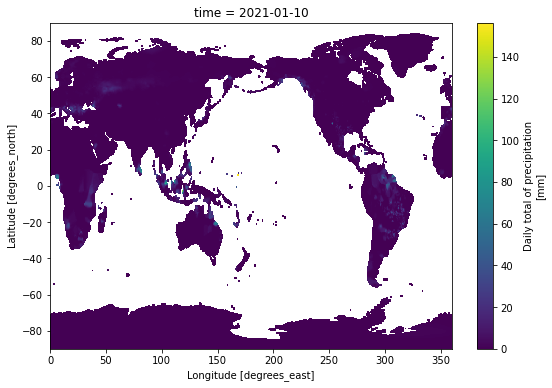

In [35]:
data_precip.precip.sel(time="2021-01-10").plot(size=6) ##Make these maps interactive now or plot just Senegal's lat long using filters on Lat Long

## Shapefile Departments

In [ ]:
depts = 